📊 Desafio 65 — Reclamações sobre Serviços de Internet
📂 Dataset: Clique para baixar o CSV

Este conjunto de dados contém reclamações de clientes sobre diferentes operadoras de internet, abordando tipos de problemas, tempo de resposta e status da resolução.

🔍 Tarefas:

Qual operadora teve o maior número de reclamações?

Qual é o tipo de problema mais comum registrado?

Existe diferença significativa no tempo médio de resposta entre os status “Resolvido” e “Não Resolvido”?

Crie um gráfico de barras com os tipos de problemas por operadora.

[Extra - Machine Learning] Construa um modelo simples de classificação (LogisticRegression ou DecisionTreeClassifier) para prever se uma reclamação será resolvida com base nas demais variáveis. Avalie com accuracy_score e classification_report.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("dia_65_reclamacoes_internet.csv")
df.head()

,data_reclamacao,operadora,tipo_problema,tempo_resposta_dias,status
0,2025-03-24,ConectaJá,Cobrança Indevida,10,Resolvido
1,2025-01-26,VeloxMax,Queda Frequente,15,Resolvido
2,2024-11-01,UltraFibra,Queda Frequente,29,Resolvido
3,2025-03-09,ConectaJá,Cobrança Indevida,7,Resolvido
4,2024-08-20,NetMais,Cobrança Indevida,4,Resolvido


In [5]:
#Qual operadora teve o maior número de reclamações?
operadora_maior_reclamacao = df["operadora"].value_counts()
print(operadora_maior_reclamacao.idxmax())

VeloxMax


In [7]:
#Qual é o tipo de problema mais comum registrado?
problema_mais_comum = df["tipo_problema"].value_counts()
print(problema_mais_comum.idxmax())

Conexão Lenta


In [13]:
#Existe diferença significativa no tempo médio de resposta entre os status “Resolvido” e “Não Resolvido”?
tempo_resolvidos_e_nao_resolvidos = df.groupby("status")["tempo_resposta_dias"].mean().round(2)
print(tempo_resolvidos_e_nao_resolvidos)

status
Não Resolvido    16.21
Resolvido        15.06
Name: tempo_resposta_dias, dtype: float64


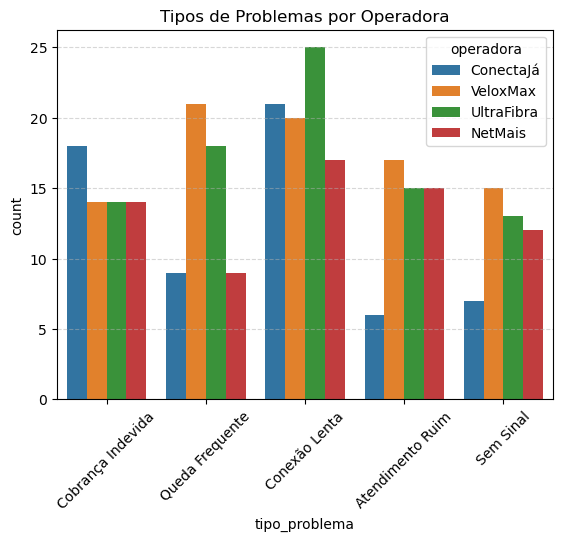

In [16]:
#Crie um gráfico de barras com os tipos de problemas por operadora.
sns.countplot(data=df, x='tipo_problema', hue='operadora')
plt.title("Tipos de Problemas por Operadora")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [23]:
#Construa um modelo simples de classificação para prever se uma reclamação será resolvida com base nas variáveis.
#Avalie com accuracy_score e classification_report.
le = LabelEncoder()
for col in ["operadora", "tipo_problema", "status"]:
    df[col] = le.fit_transform(df[col])
    
X = df.drop(["data_reclamacao", "status"], axis=1)
y = df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5333333333333333
              precision    recall  f1-score   support

           0       0.24      0.33      0.28        24
           1       0.71      0.61      0.66        66

    accuracy                           0.53        90
   macro avg       0.47      0.47      0.47        90
weighted avg       0.59      0.53      0.55        90

